# Hierarchical Clustering

# App1: Segmenting Age Groups by Marital Status Across Countries

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
df = df[['Country', 'Age Group', 'Sex', 'Marital Status']]

# One-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Country', 'Age Group', 'Sex', 'Marital Status']])


C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
# Aggregate data
# For example, you might group by Country, Age Group, and Sex and calculate proportions of marital status

# Example aggregation
df_aggregated = df.groupby(['Country', 'Age Group', 'Sex', 'Marital Status']).size().unstack(fill_value=0)
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0)


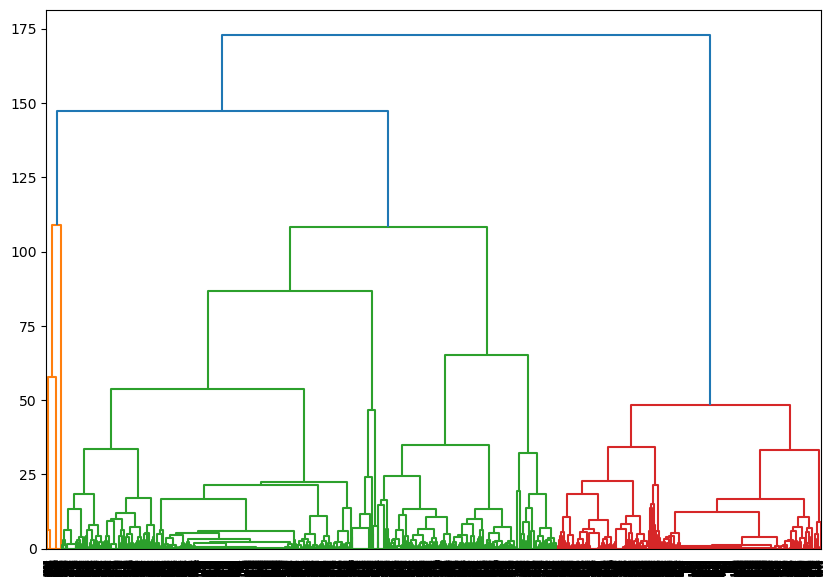

In [20]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_normalized)

# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.savefig('Hierarchical Clustering- dendogram')
plt.show()


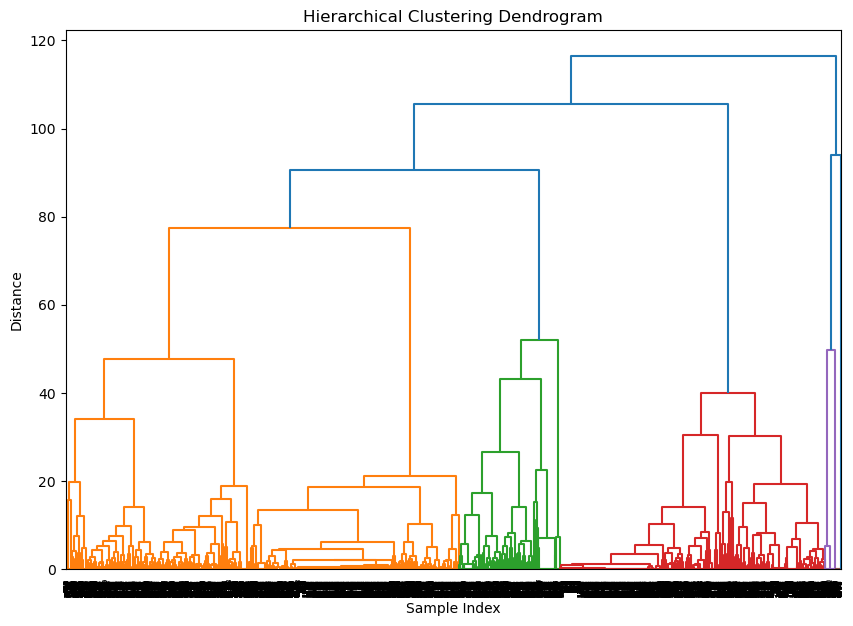

C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


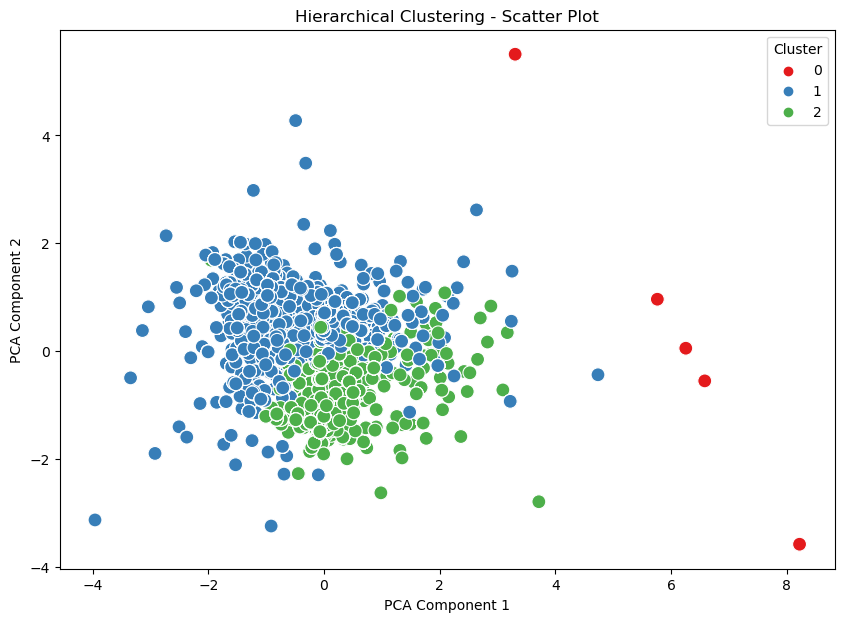

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
df = df[['Country', 'Age Group', 'Sex', 'Marital Status']]

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['Country', 'Age Group', 'Sex', 'Marital Status']])

# Convert encoded features back to a DataFrame and ensure the correct length
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Country', 'Age Group', 'Sex', 'Marital Status']))

# Concatenate the encoded features back with the original DataFrame (optional)
# df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

# Aggregation step - ensure the aggregation is compatible with encoded data
# Example: Group by 'Country', 'Age Group', and 'Sex' and calculate counts for marital status
df_aggregated = df.groupby(['Country', 'Age Group', 'Sex', 'Marital Status']).size().unstack(fill_value=0)

# Normalize the aggregated data
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_normalized)

# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Use Agglomerative Clustering to fit the data
n_clusters = 3  # You can adjust this number
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_normalized['Cluster'] = hc.fit_predict(scaled_features)

# Reduce dimensionality to 2D using PCA for scatter plot visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_normalized['PCA1'] = pca_result[:, 0]
df_normalized['PCA2'] = pca_result[:, 1]

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_normalized, palette='Set1', s=100, marker='o')
plt.title('Hierarchical Clustering - Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.savefig('Hierarchical Clustering')
plt.show()


# App 2: Analyze marriage patterns evolution with algorithms.

Number of features: 5


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


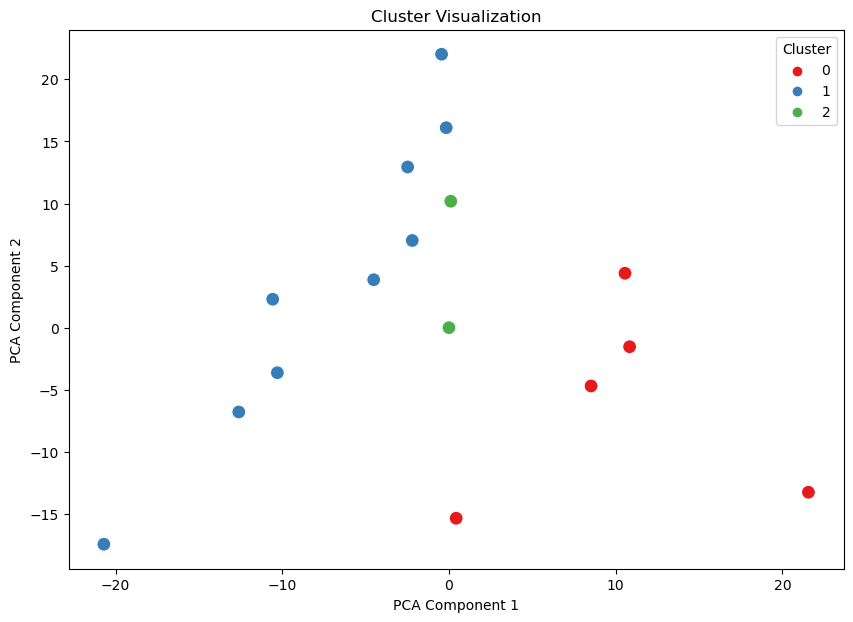

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import MiniBatchKMeans
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Downsample the dataset
df_sampled = df.sample(frac=0.01, random_state=42)

# Convert data types to more memory-efficient types
df_sampled['Start Year'] = pd.to_numeric(df_sampled['Start Year'], errors='coerce', downcast='integer')
df_sampled['Age Group'] = df_sampled['Age Group'].astype('category')
df_sampled['Sex'] = df_sampled['Sex'].astype('category')
df_sampled['Marital Status'] = df_sampled['Marital Status'].astype('category')

# Aggregate data
df_aggregated = df_sampled.groupby(['Country', 'Age Group', 'Start Year', 'Marital Status']).size().unstack(fill_value=0)

# Normalize the aggregated data
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0).fillna(0)

# Convert to sparse matrix
sparse_features = csr_matrix(df_normalized.values)

# Check number of features
num_features = sparse_features.shape[1]
print(f'Number of features: {num_features}')

# Apply dimensionality reduction
n_components = min(5, num_features)  # Adjust n_components based on the number of features
svd = TruncatedSVD(n_components=n_components)
reduced_features = svd.fit_transform(sparse_features)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_features)

# Perform clustering using MiniBatchKMeans
n_clusters = 3  # Adjust this number based on your analysis
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
df_aggregated['Cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensionality to 2D for scatter plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_aggregated['PCA1'] = pca_result[:, 0]
df_aggregated['PCA2'] = pca_result[:, 1]

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_aggregated, palette='Set1', s=100, marker='o')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from scipy.sparse import csr_matrix
from sklearn.metrics import silhouette_score

# Load dataset in chunks
chunk_size = 100000  # Adjust based on memory capacity
chunks = pd.read_csv('World_Marriage_Cleaned_Dataset.csv', chunksize=chunk_size)

# Initialize an empty DataFrame for aggregation
df_aggregated = pd.DataFrame()

for chunk in chunks:
    # Convert data types
    chunk['Start Year'] = pd.to_numeric(chunk['Start Year'], errors='coerce', downcast='integer')
    chunk['Age Group'] = chunk['Age Group'].astype('category')
    chunk['Sex'] = chunk['Sex'].astype('category')
    chunk['Marital Status'] = chunk['Marital Status'].astype('category')

    # Aggregate data in the chunk
    chunk_aggregated = chunk.groupby(['Country', 'Age Group', 'Start Year', 'Marital Status']).size().unstack(fill_value=0)
    
    # Concatenate chunk with aggregated DataFrame
    df_aggregated = pd.concat([df_aggregated, chunk_aggregated])

# Drop duplicates and fill NaN values
df_aggregated = df_aggregated.groupby(level=0).sum()
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0).fillna(0)

# Convert to sparse matrix
sparse_features = csr_matrix(df_normalized.values)

# Apply dimensionality reduction
n_components = min(5, sparse_features.shape[1])
svd = TruncatedSVD(n_components=n_components)
reduced_features = svd.fit_transform(sparse_features)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_features)

# Perform MiniBatchKMeans clustering
n_clusters = 10  # Adjust number of clusters as needed
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000)
clusters = kmeans.fit_predict(scaled_features)

# Evaluate clustering (optional)
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')


C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 512 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Silhouette Score: 0.2896253484666993
